In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metadata = pd.read_table("../data/Microbiome/circadianIHC_metadata_cleaned.txt", sep='\t', index_col=0)
metadata.head()

,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,timepoint,zt,cycle,collection_timestamp,description,...,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment
sample_name,,,,,,,,,,,,,,,,,,,,,
11548.132.133.1a,A32.133.1,not applicable,not applicable,not applicable,A32,1,2,day,12/14/17 8:00,4-8 am collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.2a,A32.133.2,not applicable,not applicable,not applicable,A32,2,6,day,12/14/17 12:00,8 am-12 pm collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.3a,A32.133.3,not applicable,not applicable,not applicable,A32,3,10,day,12/14/17 16:00,12 pm-4 pm collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.4a,A32.133.4,not applicable,not applicable,not applicable,A32,4,14,night,12/14/17 20:00,4 pm-8 pm collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.5a,A32.133.5,not applicable,not applicable,not applicable,A32,5,18,night,12/15/17 0:00,8 pm-12 am collection mouse 133,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf


In [3]:
from scipy.stats import mannwhitneyu

# Supplemental - Venn Diagram

In [4]:
rareified_OTUs = pd.read_csv("../data/Microbiome/core_diversity_12000/rarefied_table_rawcounts.txt", sep='\t', index_col=0)
rareified_OTUs = rareified_OTUs.T
rareified_OTUs.shape

(46, 412)

In [5]:
linked_OTUs = pd.merge(rareified_OTUs, metadata['exposure_type'], left_index=True, right_index=True)
linked_OTUs.head()

,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCCGTTAAGTCAGCGGTAAAATTGCGGGGCTCAAC,TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACAGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAAC,TACGGAGGATTCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCGGATAAGTTAGAGGTGAAATCCCGAGGCTCAAC,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAAC,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAGCACAAGTCTGGAGTGAAATCCCGGGGCTTAAC,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGAAGCAAGTCTGAAGTGAAAGGCGGGGGCTCAAC,TACGTAGGGAGCGAGCGTTATCCGGAATTATTGGGCGTAAAGGGTGCGTAGATGGCATAGTAAGTCTTTTGTAAAAATGCTGGGCTCAAC,TACGTAGGGGGCAAGCGTTATCCGGAATTACTGGGTGTAAAGGGAGCGTAGACGGTGATGCAAGTCTGGAGTGAAAGGCGGGGGCCCAAC,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAGGGCAAGTCTGATGTGAAAGGTCGGGGCCCAAC,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGAGAGACAAGTCAGATGTGAAATCCACGGGCTCAAC,...,TACGTAGGGGGCGAACGTTATCCGGAATGATTGGGCGTAAAGGGTACGTAGGCGGCTTTTTAAGTCAGGTGTGAAAGGCATGGGCTCAAC,TACGTAGGGGGCAAGCGTTATCCGGAATTATTGGGCATAAAGAGTACGTAGGCGGTTCTTTAAGCGCAGGGTTTAAGGCGATAGCTTAAC,TACGTAGGGAGCAAGGGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGTAGGCGGGATGGCAAGTAGAATGTTAAATCCATCGGCTCAAC,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGCGCTGCAAGTCCGGAGTGAAAGCCCATGGCTTAACC,TACGTAGGGGGCAAGCGTTATCCGGAATTACTGGGTTTAAAGGGAGAGTAGGCGGCAAGGTAAGCGATATGTGAAAGCCTTAGGCTTAAC,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGGGTGCGCAGGCGGCTTGGAAAGAACGGTGTGAAATCCCGGGGCTCAAC,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGGGCGCAGACGGCGATGAAGCCAGGAGTGAAAGCCCGGGGCCCAACC,TACGAAGGGAGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGTAGGCGGGATATTAAGTTGAATGTATAAACTACCGGCTTAAC,TACGTAGGGGGCGAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCCATGCAAGCTCGGTGTGAAAGGTGCTGGCACAAC,exposure_type
11548.A25.126.5a,1819,2,184,5833,0,0,0,3,0,98,...,0,0,0,0,0,0,0,0,0,IHC
11548.132.133.5a,768,6,37,7364,4,0,5,0,0,35,...,0,0,0,0,0,0,0,0,0,Air
11548.A31.132.3a,2150,1,67,4801,0,0,0,3,0,40,...,0,0,0,0,0,0,0,0,0,Air
11548.A29.130.5a,1530,1,92,6432,1,36,7,3,0,58,...,0,0,0,0,0,0,0,0,0,Air
11548.A26.127.1a,677,0,77,4257,0,40,0,45,0,124,...,0,0,0,0,0,0,0,0,0,IHC


In [6]:
IHC_OTUs = linked_OTUs[linked_OTUs['exposure_type'] == 'IHC'].copy()
IHC_OTUs.shape

(23, 413)

In [7]:
IHC_OTUs.drop('exposure_type', axis=1, inplace=True)

In [8]:
IHC_OTUs_real = IHC_OTUs.drop([col for col, val in IHC_OTUs.sum().iteritems() if val < 1], axis=1)
IHC_OTUs_real.shape
#OTUs with 1 or more reads

(23, 266)

In [9]:
Air_OTUs = linked_OTUs[linked_OTUs['exposure_type'] == 'Air'].copy()
Air_OTUs.shape

(23, 413)

In [10]:
Air_OTUs.drop('exposure_type', axis=1, inplace=True)

In [11]:
Air_OTUs_real = Air_OTUs.drop([col for col, val in Air_OTUs.sum().iteritems() if val < 1], axis=1)
Air_OTUs_real.shape
#OTUs with 1 or more reads

(23, 329)

In [12]:
IHC_otus = set(IHC_OTUs_real.columns)
Air_otus = set(Air_OTUs_real.columns)

In [13]:
len(IHC_otus)

266

In [14]:
len(Air_otus)

329

In [15]:
len(IHC_otus.intersection(Air_otus))

183

In [16]:
len(IHC_otus.difference(Air_otus))

83

In [17]:
len(Air_otus.difference(IHC_otus))

146

In [18]:
from matplotlib_venn import venn2, venn2_circles

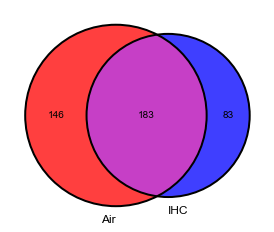

In [19]:
venn2(subsets = (146, 83,  183), set_labels = ('Air', 'IHC'), 
      set_colors=('red', 'blue'), alpha=0.75)
venn2_circles(subsets = (146, 83,  183))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_OTUs_venn.svg', dpi=300, bbox_inches="tight")
plt.show()
#about 100 OTUs per sample on average
#Air has 329 total OTUs, IHC has 266 total OTUs (with 1 or more reads)
#Air and IHC have 183 of these OTU in common
#Air has 146 unique OTUs (44% unique, 56% shared)
#IHC has 83 unique OTUs (31% unique, 69% shared)

# E - OTU Heatmaps (organized by Air phase)

In [20]:
otu_taxonomy = pd.read_table('../data/Microbiome/CircadianIHC_taxonomy.tsv', sep='\t', index_col=0)
otu_taxonomy.head()

,Taxon,Confidence
Feature ID,,
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCCGTTAAGTCAGCGGTAAAATTGCGGGGCTCAAC,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.794161
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACAGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAAC,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.982756
TACGGAGGATTCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCGGATAAGTTAGAGGTGAAATCCCGAGGCTCAAC,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.981511
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAAC,k__Bacteria; p__Verrucomicrobia; c__Verrucomic...,0.999478
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAGCACAAGTCTGGAGTGAAATCCCGGGGCTTAAC,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.913506


In [21]:
otu_metacycle_air = pd.read_table('../data/Microbiome/MetaCycle/OTU_metaout/meta2d_rarefied_relfreq_table_Air.txt', sep='\t', index_col=0)
otu_metacycle_air.head()

,JTK_pvalue,JTK_BH.Q,JTK_period,JTK_adjphase,JTK_amplitude,meta2d_Base,meta2d_AMP,meta2d_rAMP
CycID,,,,,,,,
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCCGTTAAGTCAGCGGTAAAATTGCGGGGCTCAAC,1.000000,1.000000,24,20.0,0.016912,0.086467,0.010668,0.010668
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACAGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAAC,1.000000,1.000000,20,16.0,0.000059,0.000277,0.000063,0.000063
TACGGAGGATTCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCGGATAAGTTAGAGGTGAAATCCCGAGGCTCAAC,1.000000,1.000000,20,16.0,0.000722,0.003880,0.001011,0.001011
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAAC,0.000869,0.357937,24,20.0,0.146754,0.426279,0.106121,0.106121
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAGCACAAGTCTGGAGTGAAATCCCGGGGCTTAAC,1.000000,1.000000,0,NaN,0.000000,0.000000,NaN,NaN


In [22]:
otu_metacycle_ihc = pd.read_table('../data/Microbiome/MetaCycle/OTU_metaout/meta2d_rarefied_relfreq_table_IHC.txt', sep='\t', index_col=0)
otu_metacycle_ihc.head()

,JTK_pvalue,JTK_BH.Q,JTK_period,JTK_adjphase,JTK_amplitude,meta2d_Base,meta2d_AMP,meta2d_rAMP
CycID,,,,,,,,
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCCGTTAAGTCAGCGGTAAAATTGCGGGGCTCAAC,1.000000,1.000000,24,12.0,0.004773,0.082496,0.007124,0.007124
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACAGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAAC,1.000000,1.000000,20,12.0,0.000059,0.000300,0.000047,0.000047
TACGGAGGATTCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCGGATAAGTTAGAGGTGAAATCCCGAGGCTCAAC,0.170676,1.000000,20,18.0,0.002431,0.007574,0.003299,0.003299
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAAC,0.000493,0.203141,24,20.0,0.127515,0.323406,0.061335,0.061335
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAGCACAAGTCTGGAGTGAAATCCCGGGGCTTAAC,1.000000,1.000000,24,2.0,0.000059,0.000052,0.000030,0.000030


In [23]:
named_metacycle_air = pd.merge(otu_taxonomy['Taxon'], otu_metacycle_air, left_index=True, right_index=True)
named_metacycle_ihc = pd.merge(otu_taxonomy['Taxon'], otu_metacycle_ihc, left_index=True, right_index=True)

In [24]:
named_metacycle_air2 = named_metacycle_air.dropna(subset=['JTK_adjphase'])
named_metacycle_ihc2 = named_metacycle_ihc.dropna(subset=['JTK_adjphase'])

In [25]:
named_metacycle_all_period = pd.merge(named_metacycle_air2, named_metacycle_ihc2, 
                                      left_index=True, right_index=True, suffixes=('_air', '_ihc'))
named_metacycle_all_period

,Taxon_air,JTK_pvalue_air,JTK_BH.Q_air,JTK_period_air,JTK_adjphase_air,JTK_amplitude_air,meta2d_Base_air,meta2d_AMP_air,meta2d_rAMP_air,Taxon_ihc,JTK_pvalue_ihc,JTK_BH.Q_ihc,JTK_period_ihc,JTK_adjphase_ihc,JTK_amplitude_ihc,meta2d_Base_ihc,meta2d_AMP_ihc,meta2d_rAMP_ihc
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCCGTTAAGTCAGCGGTAAAATTGCGGGGCTCAAC,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,1.000000,1.000000,24,20.0,0.016912,0.086467,0.010668,0.010668,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,1.000000,1.000000,24,12.0,0.004773,0.082496,0.007124,0.007124
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACAGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAAC,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,1.000000,1.000000,20,16.0,0.000059,0.000277,0.000063,0.000063,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,1.000000,1.000000,20,12.0,0.000059,0.000300,0.000047,0.000047
TACGGAGGATTCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCGGATAAGTTAGAGGTGAAATCCCGAGGCTCAAC,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,1.000000,1.000000,20,16.0,0.000722,0.003880,0.001011,0.001011,k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...,0.170676,1.000000,20,18.0,0.002431,0.007574,0.003299,0.003299
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAAC,k__Bacteria; p__Verrucomicrobia; c__Verrucomic...,0.000869,0.357937,24,20.0,0.146754,0.426279,0.106121,0.106121,k__Bacteria; p__Verrucomicrobia; c__Verrucomic...,0.000493,0.203141,24,20.0,0.127515,0.323406,0.061335,0.061335
TACGTAGGGGGCAAGCGTTATCCGGAATTACTGGGTGTAAAGGGAGCGTAGACGGTGATGCAAGTCTGGAGTGAAAGGCGGGGGCCCAAC,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.088233,1.000000,24,10.0,0.000295,0.000475,0.000168,0.000168,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,1.000000,1.000000,24,8.0,0.000471,0.001504,0.000224,0.000224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGACTTGCAAGTCTGATGTGAAAATCCGGGGCCCAAC,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,1.000000,1.000000,20,10.0,0.001002,0.001965,0.000876,0.000876,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,1.000000,1.000000,20,12.0,0.000118,0.000326,0.000024,0.000024
TACGTAGGTGGTAAGCGTTATCCGGAATTATTGGGCGTAAAGAGGGAGCAGGCGGCAGCAAAGGTCTGTGGTGAAAGACTGAAGCTTAAC,k__Bacteria; p__Firmicutes; c__Erysipelotrichi...,0.232266,1.000000,20,12.0,0.000177,0.000397,0.000181,0.000181,k__Bacteria; p__Firmicutes; c__Erysipelotrichi...,1.000000,1.000000,20,18.0,0.000177,0.000361,0.000113,0.000113
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGAAGAAAGTCTGAAGTGAAAGCCCGCGGCTCAAC,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.888578,1.000000,24,2.0,0.000059,0.000176,0.000113,0.000113,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,0.023889,1.000000,24,8.0,0.001473,0.002275,0.000758,0.000758
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGAATTGCAAGTCTGATGTGAAAATCCGGGGCCCAAC,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,1.000000,1.000000,20,8.0,0.000147,0.000327,0.000193,0.000193,k__Bacteria; p__Firmicutes; c__Clostridia; o__...,1.000000,1.000000,20,16.0,0.000236,0.000846,0.000493,0.000493


In [26]:
otu_rare_relfrq = pd.read_csv('../data/Microbiome/core_diversity_12000/rarefied_relfreq_table.txt', sep='\t', index_col=0)
otu_rare_relfrq.head()

,11548.A25.126.5a,11548.132.133.5a,11548.A31.132.3a,11548.A29.130.5a,11548.A26.127.1a,11548.A30.131.1a,11548.A26.127.4a,11548.A24.125.2a,11548.A30.131.4a,11548.A27.128.4a,...,11548.A29.130.2a,11548.132.133.2a,11548.A25.126.2a,11548.A31.132.4a,11548.A27.128.6a,11548.A31.132.1a,11548.A27.128.3a,11548.A24.125.5a,11548.A30.131.3a,11548.A26.127.3a
#OTU ID,,,,,,,,,,,,,,,,,,,,,
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCCGTTAAGTCAGCGGTAAAATTGCGGGGCTCAAC,0.151583,0.064000,0.179167,0.127500,0.056417,0.072833,0.051750,0.082583,0.042167,0.076833,...,0.047000,0.053000,0.123000,0.182000,0.053750,0.131583,0.047750,0.101083,0.068833,0.035083
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACAGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAAC,0.000167,0.000500,0.000083,0.000083,0.000000,0.000167,0.000250,0.000333,0.000500,0.000167,...,0.000000,0.000417,0.000083,0.000333,0.000333,0.000250,0.000333,0.000333,0.000250,0.000083
TACGGAGGATTCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCGGATAAGTTAGAGGTGAAATCCCGAGGCTCAAC,0.015333,0.003083,0.005583,0.007667,0.006417,0.006417,0.003333,0.003583,0.001833,0.010750,...,0.002917,0.002917,0.011917,0.004333,0.003667,0.005583,0.002083,0.028917,0.003167,0.003417
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAAC,0.486083,0.613667,0.400083,0.536000,0.354750,0.486500,0.382417,0.212917,0.432000,0.409667,...,0.345333,0.309833,0.123583,0.351917,0.398750,0.341083,0.273167,0.489833,0.391250,0.347750
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAGCACAAGTCTGGAGTGAAATCCCGGGGCTTAAC,0.000000,0.000333,0.000000,0.000083,0.000000,0.000000,0.000000,0.000083,0.000333,0.000167,...,0.000000,0.000083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
otu_mapheat = pd.merge(otu_rare_relfrq.T, metadata[['exposure_type', 'zt']].copy(), left_index=True, right_index=True)
otu_mapheat['combo'] = otu_mapheat['exposure_type'].astype(str) + "_" + otu_mapheat['zt'].astype(str)
otu_mapheat.drop(columns=['exposure_type', 'zt'], inplace=True)
otu_mapheat2 = otu_mapheat.set_index('combo')
otu_heatmap = otu_mapheat2.T
otu_heatmap.head()

combo,IHC_18,Air_18,Air_10,Air_18,IHC_2,Air_2,IHC_14,IHC_6,Air_14,IHC_14,...,Air_6,Air_6,IHC_6,Air_14,IHC_22,Air_2,IHC_10,IHC_18,Air_10,IHC_10
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCCGTTAAGTCAGCGGTAAAATTGCGGGGCTCAAC,0.151583,0.064000,0.179167,0.127500,0.056417,0.072833,0.051750,0.082583,0.042167,0.076833,...,0.047000,0.053000,0.123000,0.182000,0.053750,0.131583,0.047750,0.101083,0.068833,0.035083
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACAGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAAC,0.000167,0.000500,0.000083,0.000083,0.000000,0.000167,0.000250,0.000333,0.000500,0.000167,...,0.000000,0.000417,0.000083,0.000333,0.000333,0.000250,0.000333,0.000333,0.000250,0.000083
TACGGAGGATTCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCGGATAAGTTAGAGGTGAAATCCCGAGGCTCAAC,0.015333,0.003083,0.005583,0.007667,0.006417,0.006417,0.003333,0.003583,0.001833,0.010750,...,0.002917,0.002917,0.011917,0.004333,0.003667,0.005583,0.002083,0.028917,0.003167,0.003417
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAAC,0.486083,0.613667,0.400083,0.536000,0.354750,0.486500,0.382417,0.212917,0.432000,0.409667,...,0.345333,0.309833,0.123583,0.351917,0.398750,0.341083,0.273167,0.489833,0.391250,0.347750
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAGCACAAGTCTGGAGTGAAATCCCGGGGCTTAAC,0.000000,0.000333,0.000000,0.000083,0.000000,0.000000,0.000000,0.000083,0.000333,0.000167,...,0.000000,0.000083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
otu_air_phase = pd.merge(otu_heatmap, named_metacycle_all_period['JTK_adjphase_air'], left_index=True, right_index=True)
otu_air_phase.head()

,IHC_18,Air_18,Air_10,Air_18,IHC_2,Air_2,IHC_14,IHC_6,Air_14,IHC_14,...,Air_6,IHC_6,Air_14,IHC_22,Air_2,IHC_10,IHC_18,Air_10,IHC_10,JTK_adjphase_air
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCCGTTAAGTCAGCGGTAAAATTGCGGGGCTCAAC,0.151583,0.064000,0.179167,0.127500,0.056417,0.072833,0.051750,0.082583,0.042167,0.076833,...,0.053000,0.123000,0.182000,0.053750,0.131583,0.047750,0.101083,0.068833,0.035083,20.0
TACGGAGGATCCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGTGGACAGTTAAGTCAGTTGTGAAAGTTTGCGGCTCAAC,0.000167,0.000500,0.000083,0.000083,0.000000,0.000167,0.000250,0.000333,0.000500,0.000167,...,0.000417,0.000083,0.000333,0.000333,0.000250,0.000333,0.000333,0.000250,0.000083,16.0
TACGGAGGATTCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGTCGGATAAGTTAGAGGTGAAATCCCGAGGCTCAAC,0.015333,0.003083,0.005583,0.007667,0.006417,0.006417,0.003333,0.003583,0.001833,0.010750,...,0.002917,0.011917,0.004333,0.003667,0.005583,0.002083,0.028917,0.003167,0.003417,16.0
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAAC,0.486083,0.613667,0.400083,0.536000,0.354750,0.486500,0.382417,0.212917,0.432000,0.409667,...,0.309833,0.123583,0.351917,0.398750,0.341083,0.273167,0.489833,0.391250,0.347750,20.0
TACGTAGGGGGCAAGCGTTATCCGGAATTACTGGGTGTAAAGGGAGCGTAGACGGTGATGCAAGTCTGGAGTGAAAGGCGGGGGCCCAAC,0.000250,0.000000,0.000250,0.000250,0.003750,0.000167,0.004250,0.001167,0.000417,0.000417,...,0.000917,0.002417,0.000833,0.000333,0.001417,0.000500,0.001000,0.000750,0.003167,10.0


In [29]:
otu_air_phase2 = otu_air_phase.sort_values(by=['JTK_adjphase_air'])
otu_air_phase2

,IHC_18,Air_18,Air_10,Air_18,IHC_2,Air_2,IHC_14,IHC_6,Air_14,IHC_14,...,Air_6,IHC_6,Air_14,IHC_22,Air_2,IHC_10,IHC_18,Air_10,IHC_10,JTK_adjphase_air
TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGTGTAAAGGGCGTGTAGGCGGGAATGCAAGTCAGATGTGAAAACTCAGGGCTCAAC,0.008667,0.000750,0.000000,0.007167,0.010000,0.006917,0.011500,0.000000,0.005333,0.001167,...,0.000167,0.017333,0.000000,0.002167,0.000000,0.002750,0.000000,0.008250,0.009667,0.0
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGAAGAAAGTCTGAAGTGAAAGCCCGCGGCTCAAC,0.000000,0.000417,0.000167,0.000167,0.004667,0.000167,0.003250,0.001333,0.000000,0.002083,...,0.000083,0.000917,0.000000,0.001250,0.000000,0.003750,0.001083,0.000583,0.003667,2.0
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGACGGCAGTGCAAGTCTGGAGTGAAAGCCCGGGGCCCAAC,0.002500,0.000500,0.000000,0.000000,0.000250,0.000583,0.003667,0.000000,0.000333,0.000917,...,0.000667,0.007000,0.001250,0.000667,0.000417,0.002333,0.000000,0.000250,0.000417,4.0
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAGTGCAAGTCTGAAGTGAAAGGCAAGGGCTCAAC,0.000083,0.000000,0.000000,0.000667,0.000000,0.000000,0.002583,0.001083,0.000000,0.000000,...,0.000667,0.000333,0.000917,0.000000,0.001083,0.000250,0.000250,0.000000,0.000500,4.0
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGACTGTCAAGTCAGCGGTAAAATTGAGAGGCTCAAC,0.068917,0.062083,0.158917,0.092417,0.140250,0.182333,0.071083,0.400917,0.069167,0.135500,...,0.118833,0.310250,0.028417,0.190667,0.115417,0.267167,0.128667,0.105417,0.091333,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAAC,0.486083,0.613667,0.400083,0.536000,0.354750,0.486500,0.382417,0.212917,0.432000,0.409667,...,0.309833,0.123583,0.351917,0.398750,0.341083,0.273167,0.489833,0.391250,0.347750,20.0
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAATACAAGTCGGAAGTGAAATACCCGGGCTCAAC,0.000500,0.001500,0.000250,0.000750,0.001667,0.000917,0.000250,0.000750,0.001667,0.000583,...,0.001000,0.001833,0.000333,0.001167,0.000500,0.001167,0.000333,0.001833,0.000917,20.0
TACGTAGGTGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGCGAGTAGGCGGGATTGCAAGTCAGATGTGAAAACTATGGGCTCAAC,0.000167,0.000417,0.000000,0.000083,0.000000,0.000250,0.000000,0.000000,0.001250,0.000250,...,0.000000,0.000000,0.000000,0.000333,0.000000,0.000250,0.000000,0.000417,0.000000,20.0
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCAATACAAGTCGGAAGTGAAATACCCGGGCTTAAC,0.000000,0.000000,0.000000,0.000417,0.000083,0.000167,0.000000,0.000000,0.000250,0.000000,...,0.000000,0.000167,0.000250,0.000500,0.000000,0.000000,0.000000,0.000083,0.000000,20.0


In [30]:
otu_airphase_air = otu_air_phase2.filter(regex='Air')
otu_airphase_ihc = otu_air_phase2.filter(regex='IHC')

In [31]:
otu_airphase_air2 = otu_airphase_air.groupby(by=otu_airphase_air.columns, axis=1).mean()
otu_airphase_ihc2 = otu_airphase_ihc.groupby(by=otu_airphase_ihc.columns, axis=1).mean()

In [32]:
otu_airphase_ihc2.columns

Index(['IHC_10', 'IHC_14', 'IHC_18', 'IHC_2', 'IHC_22', 'IHC_6'], dtype='object')

In [33]:
Air_cols = ['Air_2', 'Air_6', 'Air_10', 'Air_14', 'Air_18', 'Air_22']
IHC_cols = ['IHC_2', 'IHC_6', 'IHC_10', 'IHC_14', 'IHC_18', 'IHC_22']
otu_airphase_air3 = otu_airphase_air2[Air_cols]
otu_airphase_ihc3 = otu_airphase_ihc2[IHC_cols]

In [34]:
print(len(otu_airphase_air3.index))
print(len(otu_airphase_ihc3.index))

92
92


#### Phase Clustering

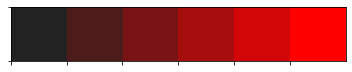

In [35]:
cmap_air = sns.dark_palette("red", as_cmap=True)
sns.palplot(sns.dark_palette("red"))

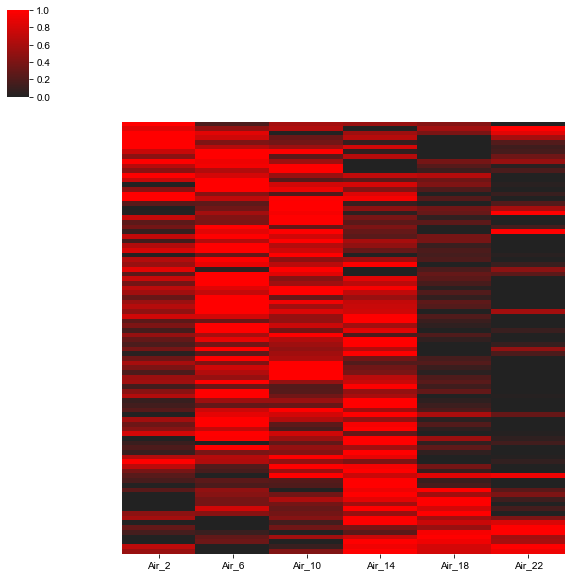

In [36]:
sns.clustermap(otu_airphase_air3, standard_scale=0, cmap=cmap_air,
               col_cluster=False, row_cluster=False, yticklabels=False)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_OTUs_heatmap_stdscle_airphase_air.svg', dpi=300, bbox_inches="tight")

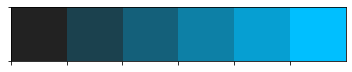

In [37]:
cmap_ihc = sns.dark_palette("deepskyblue", as_cmap=True)
sns.palplot(sns.dark_palette("deepskyblue"))

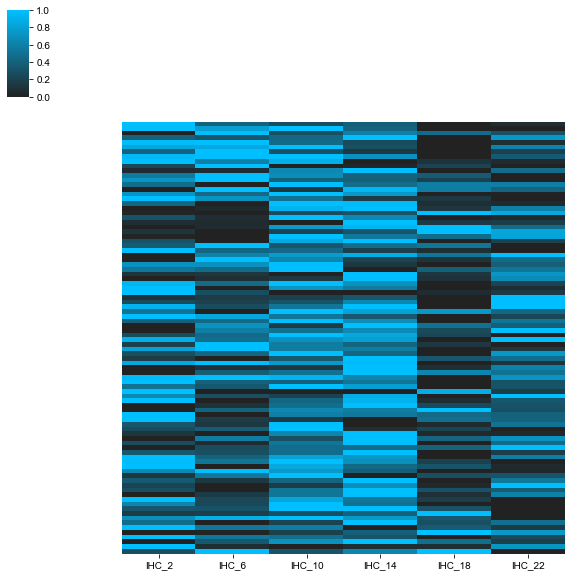

In [38]:
sns.clustermap(otu_airphase_ihc3, standard_scale=0, cmap=cmap_ihc,
               col_cluster=False, row_cluster=False, yticklabels=False)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_OTUs_heatmap_stdscle_airphase_ihc.svg', dpi=300, bbox_inches="tight")

#### Computer Clustering

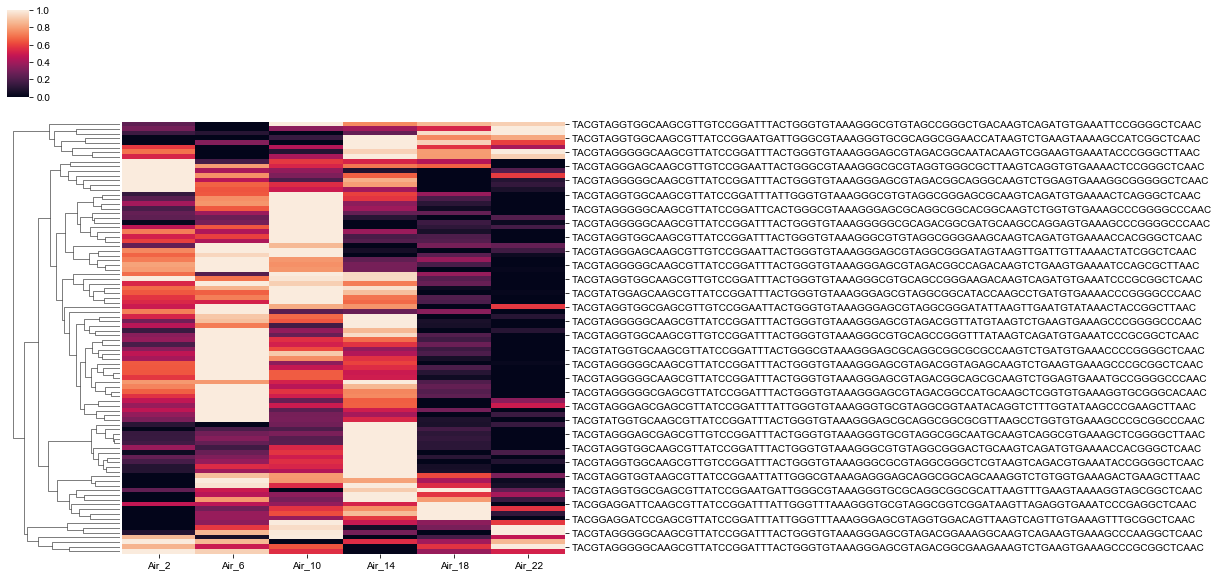

In [39]:
air_clustermap2 = sns.clustermap(otu_airphase_air3, standard_scale=0, col_cluster=False)

In [40]:
numbered_list = air_clustermap2.dendrogram_row.reordered_ind

In [41]:
air_cluster_list = list(air_clustermap2.data2d.index)

In [42]:
otu_airphase_ihc4 = otu_airphase_ihc3.reindex(air_cluster_list)
otu_airphase_ihc4

,IHC_2,IHC_6,IHC_10,IHC_14,IHC_18,IHC_22
TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGCCGGGCTGACAAGTCAGATGTGAAATTCCGGGGCTCAAC,0.002250,0.003125,0.004125,0.001937,0.002583,0.002646
TACGTAGGTGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGGAGAGCAAGTCAGACGTGAAATTCCAGGGCTCAAC,0.002833,0.001979,0.002042,0.000979,0.001646,0.001271
TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAAC,0.208250,0.214167,0.263729,0.318083,0.489083,0.418333
TACGTAGGTGGCAAGCGTTATCCGGAATGATTGGGCGTAAAGGGTGCGCAGGCGGAACCATAAGTCTGAAGTAAAAGCCATCGGCTCAAC,0.000139,0.000000,0.000062,0.000292,0.000083,0.000146
TACGTAGGTGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGCGAGTAGGCGGGATTGCAAGTCAGATGTGAAAACTATGGGCTCAAC,0.000028,0.000125,0.000229,0.000313,0.000167,0.000083
...,...,...,...,...,...,...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGAAAGGCAAGTCAGAAGTGAAAGCCCAAGGCTCAAC,0.011361,0.009062,0.013000,0.015083,0.027458,0.024438
TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGCCGGGTTGACAAGTCAGATGTGAAATCCTGCGGCTTAAC,0.000944,0.000896,0.001229,0.000604,0.000854,0.000937
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGACGGCAGTGCAAGTCTGGAGTGAAAGCCCGGGGCCCAAC,0.000361,0.002062,0.000854,0.001375,0.001146,0.000875
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCGAAGAAAGTCTGAAGTGAAAGCCCGCGGCTCAAC,0.003556,0.003042,0.003604,0.002021,0.000875,0.000875


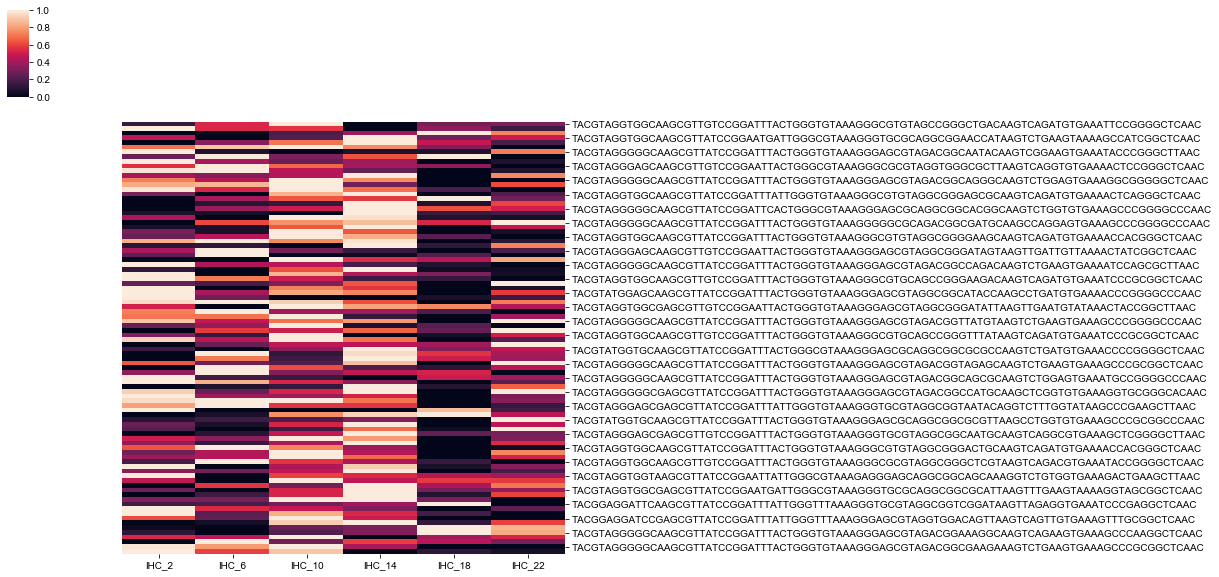

In [43]:
sns.clustermap(otu_airphase_ihc4, standard_scale=0, col_cluster=False, row_cluster=False)

# F - Density Plot based on Phase

In [44]:
densityAir = pd.read_table('../data/Microbiome/MetaCycle/OTU_metaout/meta2d_rarefied_relfreq_table_Air.txt', 
                    sep='\t', index_col=0)
densityIHC = pd.read_table('../data/Microbiome/MetaCycle/OTU_metaout/meta2d_rarefied_relfreq_table_IHC.txt', 
                    sep='\t', index_col=0)

In [45]:
densityAir2 = densityAir.dropna(subset=['JTK_adjphase'])
densityIHC2 = densityIHC.dropna(subset=['JTK_adjphase'])

In [46]:
common_index = list(set(densityAir2.index).intersection(set(densityIHC2.index)))
print(len(common_index))
#92 cycling OTUs in common

92


In [47]:
densityAir3 = densityAir2[densityAir2.index.isin(common_index)]
densityIHC3 = densityIHC2[densityIHC2.index.isin(common_index)]

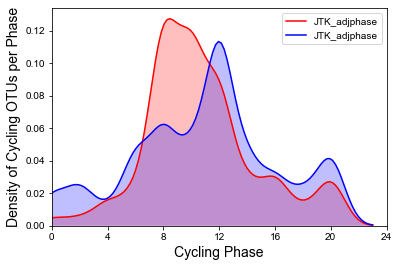

In [48]:
ax = sns.kdeplot(densityAir3['JTK_adjphase'], bw=1, color='red', shade=True)
ax = sns.kdeplot(densityIHC3['JTK_adjphase'], bw=1, color='blue', shade=True)
ax.set_ylabel('Density of Cycling OTUs per Phase', size=14)
ax.set_xlabel('Cycling Phase', size=14)
ax.set(xlim=(0, 24))
ax.set_xticks([0, 4, 8, 12, 16, 20, 24])
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_OTUs_density.svg', dpi=300, bbox_inches="tight")

# Supplemental - Observed OTUs

In [49]:
curve = pd.read_csv("../data/Microbiome/core_diversity_12000/observed_otus_curve.csv", index_col=0)
curve.shape

(48, 100)

In [50]:
curves = curve.dropna(subset=['depth-2223_iter-1'])
curves.shape

(46, 100)

In [51]:
curves.columns = curves.columns.str.split('_').str[0]

In [52]:
curves.head()

,depth-1,depth-1,depth-1,depth-1,depth-1,depth-1,depth-1,depth-1,depth-1,depth-1,...,depth-20000,depth-20000,depth-20000,depth-20000,depth-20000,depth-20000,depth-20000,depth-20000,depth-20000,depth-20000
sample-id,,,,,,,,,,,,,,,,,,,,,
11548.A25.126.5a,1,1,1,1,1,1,1,1,1,1,...,93.0,93.0,93.0,92.0,93.0,92.0,93.0,93.0,91.0,93.0
11548.132.133.5a,1,1,1,1,1,1,1,1,1,1,...,116.0,117.0,118.0,117.0,116.0,120.0,118.0,115.0,119.0,116.0
11548.A31.132.3a,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11548.A29.130.5a,1,1,1,1,1,1,1,1,1,1,...,132.0,125.0,130.0,132.0,130.0,123.0,132.0,132.0,130.0,132.0
11548.A26.127.1a,1,1,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
curve2 = curves.groupby(curves.columns, axis=1).mean()

In [54]:
curve2.columns = curve2.columns.str.split('-').str[-1]
curve2.head()

,1,11111,13333,15555,17777,20000,2223,4445,6667,8889
sample-id,,,,,,,,,,
11548.A25.126.5a,1.0,85.8,88.6,89.6,91.5,92.6,65.1,75.0,80.5,84.2
11548.132.133.5a,1.0,109.5,110.8,113.5,116.2,117.2,77.5,92.9,99.8,105.5
11548.A31.132.3a,1.0,87.3,88.7,91.3,91.8,NaN,65.5,76.8,81.3,85.3
11548.A29.130.5a,1.0,120.5,125.3,127.7,130.4,129.8,83.7,101.1,108.3,115.2
11548.A26.127.1a,1.0,97.5,98.8,NaN,NaN,NaN,77.3,86.5,90.9,95.5


In [55]:
curve3 = curve2.reset_index()

In [56]:
curve4 = pd.melt(curve3, id_vars=['sample-id'], value_vars=['1', '11111', '13333', '15555', '17777',
       '20000', '2223', '4445', '6667', '8889'], var_name='seq_depth', value_name='num_otu')
curve4.set_index('sample-id', inplace=True)
curve4.head()

,seq_depth,num_otu
sample-id,,
11548.A25.126.5a,1,1.0
11548.132.133.5a,1,1.0
11548.A31.132.3a,1,1.0
11548.A29.130.5a,1,1.0
11548.A26.127.1a,1,1.0


In [57]:
curve_named = pd.merge(curve4, metadata, left_index=True, right_index=True)
curve_named

,seq_depth,num_otu,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,timepoint,zt,cycle,...,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment
11548.132.133.1a,1,1.0,A32.133.1,not applicable,not applicable,not applicable,A32,1,2,day,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.1a,11111,100.7,A32.133.1,not applicable,not applicable,not applicable,A32,1,2,day,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.1a,13333,103.4,A32.133.1,not applicable,not applicable,not applicable,A32,1,2,day,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.1a,15555,105.7,A32.133.1,not applicable,not applicable,not applicable,A32,1,2,day,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.132.133.1a,17777,106.5,A32.133.1,not applicable,not applicable,not applicable,A32,1,2,day,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11548.A31.132.6a,20000,90.8,A31.132.6,not applicable,not applicable,not applicable,A31,6,22,night,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A31.132.6a,2223,68.1,A31.132.6,not applicable,not applicable,not applicable,A31,6,22,night,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A31.132.6a,4445,76.8,A31.132.6,not applicable,not applicable,not applicable,A31,6,22,night,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A31.132.6a,6667,82.9,A31.132.6,not applicable,not applicable,not applicable,A31,6,22,night,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf


In [58]:
curve_named = curve_named.astype({"seq_depth": int})

In [59]:
curve_named_less = curve_named[curve_named.seq_depth != 20000]
curve_named_less = curve_named_less[curve_named_less.seq_depth != 17777]

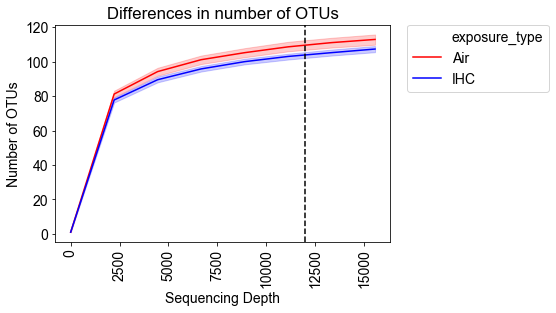

In [111]:
ax = sns.lineplot(y='num_otu', x='seq_depth', hue='exposure_type',
                  palette=['red', 'blue'], ci=68, data=curve_named_less)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Differences in number of OTUs")
plt.ylabel('Number of OTUs')
plt.xlabel('Sequencing Depth')
plt.xticks(rotation=90)
plt.axvline(12000, linestyle='dashed', color='k') #rarefaction depth
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_OTUs_seqdepth.svg', dpi=300, bbox_inches="tight")

In [61]:
curve_named_15555 = curve_named[curve_named.seq_depth == 15555]
x = list(curve_named_15555[curve_named_15555['exposure_type'] == 'Air'].num_otu.values)
y = list(curve_named_15555[curve_named_15555['exposure_type'] == 'IHC'].num_otu.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=200.0, pvalue=0.07983222212594465)

In [62]:
curve_named_17777 = curve_named[curve_named.seq_depth == 17777]
x = list(curve_named_17777[curve_named_17777['exposure_type'] == 'Air'].num_otu.values)
y = list(curve_named_17777[curve_named_17777['exposure_type'] == 'IHC'].num_otu.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=204.0, pvalue=0.09371977831151856)

In [63]:
curve_named_13333 = curve_named[curve_named.seq_depth == 13333]
x = list(curve_named_13333[curve_named_13333['exposure_type'] == 'Air'].num_otu.values)
y = list(curve_named_13333[curve_named_13333['exposure_type'] == 'IHC'].num_otu.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=183.5, pvalue=0.038473424030911106)

In [64]:
curve_named_11111 = curve_named[curve_named.seq_depth == 11111]
x = list(curve_named_11111[curve_named_11111['exposure_type'] == 'Air'].num_otu.values)
y = list(curve_named_11111[curve_named_11111['exposure_type'] == 'IHC'].num_otu.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=183.0, pvalue=0.03756513360023609)

### At rarefaction depth

In [65]:
OTUs = pd.read_csv("../data/Microbiome/core_diversity_12000/observed_otus.tsv", sep='\t', index_col=0)
OTUs.head()
#observed OTUs at rarefaction depth 12,000

,observed_otus
11548.A25.126.5a,90
11548.132.133.5a,111
11548.A31.132.3a,87
11548.A29.130.5a,123
11548.A26.127.1a,98


In [66]:
OTU_depth = pd.merge(OTUs, metadata, left_index=True, right_index=True)
OTU_depth.head()

,observed_otus,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,timepoint,zt,cycle,collection_timestamp,...,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment
11548.A25.126.5a,90,A25.126.5,not applicable,not applicable,not applicable,A25,5,18,night,12/15/17 0:00,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber
11548.132.133.5a,111,A32.133.5,not applicable,not applicable,not applicable,A32,5,18,night,12/15/17 0:00,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A31.132.3a,87,A31.132.3,not applicable,not applicable,not applicable,A31,3,10,day,12/14/17 16:00,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A29.130.5a,123,A29.130.5,not applicable,not applicable,not applicable,A29,5,18,night,12/15/17 0:00,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A26.127.1a,98,A26.127.1,not applicable,not applicable,not applicable,A26,1,2,day,12/14/17 8:00,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber


In [67]:
x = list(OTU_depth[OTU_depth['exposure_type'] == 'Air'].observed_otus.values)
y = list(OTU_depth[OTU_depth['exposure_type'] == 'IHC'].observed_otus.values)

mannwhitneyu(x, y)

MannwhitneyuResult(statistic=190.5, pvalue=0.053060001376055634)

In [68]:
OTU_depth[OTU_depth['exposure_type'] == 'Air'].observed_otus.mean()

109.95652173913044

In [69]:
OTU_depth[OTU_depth['exposure_type'] == 'IHC'].observed_otus.mean()

104.6086956521739

In [ ]:
#mean difference of 5 OTU

# A - Alpha Diversity

In [70]:
faith = pd.read_csv("../data/Microbiome/core_diversity_12000/faith_a_diversity.tsv", sep='\t', index_col=0)
faith.head()

,faith_pd
11548.A25.126.5a,10.090772
11548.132.133.5a,13.489177
11548.A31.132.3a,10.026200
11548.A29.130.5a,13.336333
11548.A26.127.1a,10.596257


In [71]:
faith_time = pd.merge(faith, metadata, left_index=True, right_index=True)
faith_time.head()

,faith_pd,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,timepoint,zt,cycle,collection_timestamp,...,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment
11548.A25.126.5a,10.090772,A25.126.5,not applicable,not applicable,not applicable,A25,5,18,night,12/15/17 0:00,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber
11548.132.133.5a,13.489177,A32.133.5,not applicable,not applicable,not applicable,A32,5,18,night,12/15/17 0:00,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A31.132.3a,10.026200,A31.132.3,not applicable,not applicable,not applicable,A31,3,10,day,12/14/17 16:00,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A29.130.5a,13.336333,A29.130.5,not applicable,not applicable,not applicable,A29,5,18,night,12/15/17 0:00,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A26.127.1a,10.596257,A26.127.1,not applicable,not applicable,not applicable,A26,1,2,day,12/14/17 8:00,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber


In [72]:
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

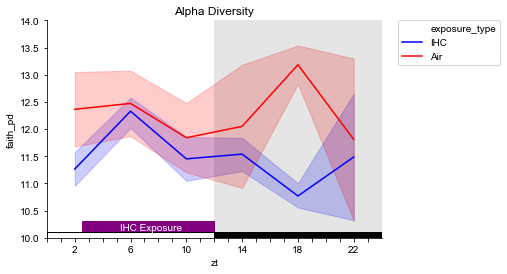

In [73]:
ax = sns.lineplot(y='faith_pd', x='zt', hue='exposure_type', palette=['blue', 'red'], ci=68, data=faith_time)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Alpha Diversity")
plt.ylim(10, 14)
plt.xlim(0, 24)
ax.set_xticks(range(24)) 
ax.set_xticklabels(['', '', '2','', '','', '6','', '','', '10','', '','', '14','', '','', '18','', '','', '22','', '',])
rect = patches.Rectangle((12,0),40,30,linewidth=1,edgecolor='none',facecolor='k', alpha=0.1)
ax.add_patch(rect)
exp = patches.Rectangle((2.5, 0.3), 9.5, 10,linewidth=1,edgecolor='purple',facecolor='purple')
ax.add_patch(exp)
day = patches.Rectangle((0,0.1), 12, 10,linewidth=1,edgecolor='k',facecolor='w')
ax.add_patch(day)
night = patches.Rectangle((12,0.1), 12, 10,linewidth=1,edgecolor='k',facecolor='k')
ax.add_patch(night)
ax.text(7.5, 10.15, "IHC Exposure", ha='center', size=10, color='w')
sns.despine()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_faithdiversity_SEM.svg', dpi=300, bbox_inches="tight")

In [74]:
for tk in faith_time.zt.unique():
    TP = faith_time[faith_time["zt"] == tk]
    x = list(TP[TP['exposure_type'] == 'Air'].faith_pd.values)
    y = list(TP[TP['exposure_type'] == 'IHC'].faith_pd.values)
    w, z = mannwhitneyu(x, y)
    print("ZT", tk)
    print(z)
    print("___________________________")
#only ZT 18 has a p<0.05

ZT 18
0.015191410988288745
___________________________
ZT 10
0.33250277105101456
___________________________
ZT 2
0.29794154528258887
___________________________
ZT 14
0.29794154528258887
___________________________
ZT 6
0.33250277105101456
___________________________
ZT 22
0.44261695723660077
___________________________


# D - Area plots

In [75]:
family_rf = pd.read_csv("../data/Microbiome/core_diversity_12000/rarefied_family_relfreq_table.txt", sep='\t', index_col=0)
family_relfreq = family_rf.T
family_relfreq.head()

#OTU ID,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales;f__Cenarchaeaceae,k__Bacteria;__;__;__;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Propionibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae,k__Bacteria;p__Tenericutes;c__Mollicutes;__;__,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Puniceicoccales;f__Puniceicoccaceae,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
11548.A25.126.5a,0.000000,0.020250,0.0,0.0,0.0,0.000000,0.000500,0.0,0.000167,0.00000,...,0.0,0.0,0.000000,0.0,0.000000,0.000583,0.0,0.486083,0.0,0.0
11548.132.133.5a,0.000667,0.012833,0.0,0.0,0.0,0.001083,0.001417,0.0,0.000500,0.00025,...,0.0,0.0,0.000417,0.0,0.000417,0.000000,0.0,0.613667,0.0,0.0
11548.A31.132.3a,0.000000,0.010167,0.0,0.0,0.0,0.000000,0.001667,0.0,0.000083,0.00000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.400083,0.0,0.0
11548.A29.130.5a,0.000000,0.012833,0.0,0.0,0.0,0.003583,0.000750,0.0,0.000083,0.00000,...,0.0,0.0,0.000000,0.0,0.000583,0.001583,0.0,0.536000,0.0,0.0
11548.A26.127.1a,0.000000,0.010667,0.0,0.0,0.0,0.000583,0.000667,0.0,0.000000,0.00000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.354750,0.0,0.0


In [76]:
fam_rf_labels = pd.merge(family_relfreq, metadata[['exposure_type', 'zt']], left_index=True, right_index=True)
fam_rf_labels.head()

,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales;f__Cenarchaeaceae,k__Bacteria;__;__;__;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Propionibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae,k__Bacteria;p__Tenericutes;c__Mollicutes;__;__,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Puniceicoccales;f__Puniceicoccaceae,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae,exposure_type,zt
11548.A25.126.5a,0.000000,0.020250,0.0,0.0,0.0,0.000000,0.000500,0.0,0.000167,0.00000,...,0.000000,0.0,0.000000,0.000583,0.0,0.486083,0.0,0.0,IHC,18
11548.132.133.5a,0.000667,0.012833,0.0,0.0,0.0,0.001083,0.001417,0.0,0.000500,0.00025,...,0.000417,0.0,0.000417,0.000000,0.0,0.613667,0.0,0.0,Air,18
11548.A31.132.3a,0.000000,0.010167,0.0,0.0,0.0,0.000000,0.001667,0.0,0.000083,0.00000,...,0.000000,0.0,0.000000,0.000000,0.0,0.400083,0.0,0.0,Air,10
11548.A29.130.5a,0.000000,0.012833,0.0,0.0,0.0,0.003583,0.000750,0.0,0.000083,0.00000,...,0.000000,0.0,0.000583,0.001583,0.0,0.536000,0.0,0.0,Air,18
11548.A26.127.1a,0.000000,0.010667,0.0,0.0,0.0,0.000583,0.000667,0.0,0.000000,0.00000,...,0.000000,0.0,0.000000,0.000000,0.0,0.354750,0.0,0.0,IHC,2


In [77]:
fam_rf_labels["both"] = fam_rf_labels['exposure_type'].astype(str) + "_" + fam_rf_labels['zt'].astype(str)
fam_rf_labels.head()

,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales;f__Cenarchaeaceae,k__Bacteria;__;__;__;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Propionibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae,...,k__Bacteria;p__Tenericutes;c__Mollicutes;__;__,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Puniceicoccales;f__Puniceicoccaceae,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae,exposure_type,zt,both
11548.A25.126.5a,0.000000,0.020250,0.0,0.0,0.0,0.000000,0.000500,0.0,0.000167,0.00000,...,0.0,0.000000,0.000583,0.0,0.486083,0.0,0.0,IHC,18,IHC_18
11548.132.133.5a,0.000667,0.012833,0.0,0.0,0.0,0.001083,0.001417,0.0,0.000500,0.00025,...,0.0,0.000417,0.000000,0.0,0.613667,0.0,0.0,Air,18,Air_18
11548.A31.132.3a,0.000000,0.010167,0.0,0.0,0.0,0.000000,0.001667,0.0,0.000083,0.00000,...,0.0,0.000000,0.000000,0.0,0.400083,0.0,0.0,Air,10,Air_10
11548.A29.130.5a,0.000000,0.012833,0.0,0.0,0.0,0.003583,0.000750,0.0,0.000083,0.00000,...,0.0,0.000583,0.001583,0.0,0.536000,0.0,0.0,Air,18,Air_18
11548.A26.127.1a,0.000000,0.010667,0.0,0.0,0.0,0.000583,0.000667,0.0,0.000000,0.00000,...,0.0,0.000000,0.000000,0.0,0.354750,0.0,0.0,IHC,2,IHC_2


In [78]:
fam_rf_labels.drop(columns=['exposure_type', 'zt'], inplace=True)
fam_rf_labeled = fam_rf_labels.set_index("both")
#changes unique id to exposure type and timepoint

In [79]:
fam_rf_labeled2 = fam_rf_labeled.reset_index()
fam_rf_labeled_ordered_IHC = fam_rf_labeled2[fam_rf_labeled2['both'].str.contains("IHC")].copy()
fam_rf_labeled_ordered_Air = fam_rf_labeled2[fam_rf_labeled2['both'].str.contains("Air")].copy()

In [80]:
fam_rf_labeled_ordered_Air_mean = fam_rf_labeled_ordered_Air.groupby('both').mean()
fam_rf_labeled_ordered_IHC_mean = fam_rf_labeled_ordered_IHC.groupby('both').mean()

In [81]:
IHC_reorderlist = ['IHC_2','IHC_6' ,'IHC_10' ,'IHC_14', 'IHC_18', 'IHC_22', ]
Air_reorderlist = ['Air_2', 'Air_6', 'Air_10', 'Air_14', 'Air_18', 'Air_22']

In [82]:
fam_rf_labeled_ordered_Air_mean.index = Air_reorderlist
fam_rf_labeled_ordered_Air_mean

,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales;f__Cenarchaeaceae,k__Bacteria;__;__;__;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Propionibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae,k__Bacteria;p__Tenericutes;c__Mollicutes;__;__,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Puniceicoccales;f__Puniceicoccaceae,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
Air_2,0.000000,0.018562,0.0,0.000000,0.000000,0.006167,0.002437,0.000000,0.000271,0.000000,...,0.000000,0.000000,0.000000,0.000042,0.000167,0.000250,0.000000,0.309292,0.000000,0.000000
Air_6,0.000000,0.019694,0.0,0.000000,0.000000,0.003056,0.004444,0.000000,0.000306,0.000000,...,0.000028,0.000000,0.000000,0.000000,0.000167,0.000194,0.000000,0.381167,0.000000,0.000000
Air_10,0.000167,0.011542,0.0,0.000000,0.000000,0.001292,0.000958,0.000000,0.000500,0.000063,...,0.000000,0.000063,0.000125,0.000000,0.000250,0.000396,0.000000,0.576604,0.000042,0.000021
Air_14,0.000000,0.012188,0.0,0.000021,0.000000,0.002042,0.001042,0.000000,0.000333,0.000000,...,0.000083,0.000063,0.000042,0.000000,0.000208,0.000708,0.000000,0.353458,0.000000,0.000000
Air_18,0.000000,0.008188,0.0,0.000000,0.000000,0.001229,0.000771,0.000062,0.000208,0.000000,...,0.000104,0.000000,0.000042,0.000000,0.000000,0.000354,0.000146,0.587583,0.000021,0.000083
Air_22,0.000000,0.018583,0.0,0.000000,0.000146,0.003375,0.002083,0.000000,0.000292,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000125,0.000375,0.000000,0.338333,0.000000,0.000021


In [83]:
fam_rf_labeled_ordered_Air_sb = fam_rf_labeled_ordered_Air_mean.sort_values(by=["Air_2"], axis=1, ascending=False)
fam_rf_labeled_ordered_Air_sb

,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;__,k__Bacteria;__;__;__;__,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae,...,k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__Chlorophyta;f__Ulvophyceae,k__Bacteria;p__Chloroflexi;c__Anaerolineae;o__GCA004;f__,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia;o__Flavobacteriales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Paraprevotellaceae],k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Propionibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;__,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
Air_2,0.309292,0.271437,0.183062,0.084021,0.038125,0.030354,0.018562,0.015625,0.009771,0.009312,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Air_6,0.381167,0.185194,0.170361,0.068278,0.049472,0.024111,0.019694,0.022028,0.021056,0.024417,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Air_10,0.576604,0.124562,0.151562,0.054167,0.012542,0.019375,0.011542,0.003542,0.008979,0.009750,...,0.000000,0.0,0.000313,0.000042,0.000063,0.000000,0.000000,0.000000,0.0,0.000021
Air_14,0.353458,0.165750,0.267021,0.067229,0.058667,0.022958,0.012188,0.003708,0.006000,0.014875,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000021,0.0,0.000000
Air_18,0.587583,0.104250,0.184250,0.044771,0.018542,0.017750,0.008188,0.001646,0.006792,0.006583,...,0.000229,0.0,0.000000,0.000125,0.000000,0.000062,0.000000,0.000000,0.0,0.000083
Air_22,0.338333,0.245833,0.173271,0.069021,0.043458,0.029167,0.018583,0.016396,0.009208,0.020333,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000146,0.000000,0.0,0.000021


In [84]:
fam_rf_labeled_ordered_Air_sb_5 = fam_rf_labeled_ordered_Air_sb[['k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae',
       'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae',
       'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae']].copy()
fam_rf_labeled_ordered_Air_sb_5.head()

,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae
Air_2,0.309292,0.271437,0.183062,0.084021,0.038125
Air_6,0.381167,0.185194,0.170361,0.068278,0.049472
Air_10,0.576604,0.124562,0.151562,0.054167,0.012542
Air_14,0.353458,0.165750,0.267021,0.067229,0.058667
Air_18,0.587583,0.104250,0.184250,0.044771,0.018542


In [85]:
fam_rf_labeled_ordered_Air_sb_5["Other Families"] = 1 - fam_rf_labeled_ordered_Air_sb_5.sum(axis=1)
#Create a new column that groups all of the other families together

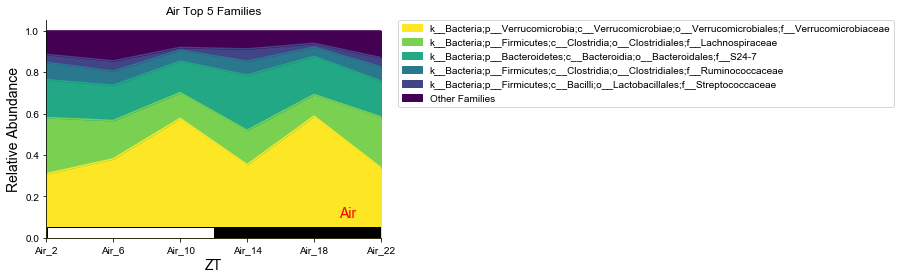

In [86]:
ax = fam_rf_labeled_ordered_Air_sb_5.plot.area(title = "Air Top 5 Families", colormap = 'viridis_r')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.text(4.5, 0.1, "Air", ha='center', size=14, color='r')
ax.add_patch(Rectangle((0.01,0.001), 3, 0.05,linewidth=1,edgecolor='k',facecolor='w'))
ax.add_patch(Rectangle((2.5,0.001), 3, 0.05,linewidth=1,edgecolor='k',facecolor='k'))
ax.set_ylabel('Relative Abundance', size=14)
ax.set_xlabel('ZT', size=14)
sns.despine()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_family_areaplot_Air.svg', dpi=300, bbox_inches="tight")

In [87]:
fam_rf_labeled_ordered_IHC_mean.index = IHC_reorderlist
fam_rf_labeled_ordered_IHC_mean

,k__Archaea;p__Crenarchaeota;c__Thaumarchaeota;o__Cenarchaeales;f__Cenarchaeaceae,k__Bacteria;__;__;__;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Propionibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae,k__Bacteria;p__Actinobacteria;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae,...,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacteriales;f__Enterobacteriaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae,k__Bacteria;p__Tenericutes;c__Mollicutes;__;__,k__Bacteria;p__Tenericutes;c__Mollicutes;o__Anaeroplasmatales;f__Anaeroplasmataceae,k__Bacteria;p__Tenericutes;c__Mollicutes;o__RF39;f__,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Puniceicoccales;f__Puniceicoccaceae,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
IHC_2,0.000000,0.021125,0.000000,0.0,0.0,0.000104,0.001083,0.000021,0.000396,0.000000,...,0.000000,0.0,0.0,0.000125,0.000021,0.000500,0.0,0.263729,0.0,0.000000
IHC_6,0.000000,0.028104,0.000021,0.0,0.0,0.000229,0.001500,0.000000,0.000313,0.000000,...,0.000000,0.0,0.0,0.000063,0.000042,0.000458,0.0,0.318104,0.0,0.000000
IHC_10,0.000000,0.016250,0.000000,0.0,0.0,0.000104,0.000500,0.000000,0.000229,0.000000,...,0.000000,0.0,0.0,0.000000,0.000083,0.000292,0.0,0.489083,0.0,0.000000
IHC_14,0.000000,0.014528,0.000000,0.0,0.0,0.000194,0.000722,0.000000,0.000361,0.000000,...,0.000000,0.0,0.0,0.000194,0.000028,0.000472,0.0,0.208250,0.0,0.000000
IHC_18,0.000104,0.015458,0.000000,0.0,0.0,0.000000,0.000750,0.000063,0.000229,0.000104,...,0.000000,0.0,0.0,0.000000,0.000104,0.000458,0.0,0.418333,0.0,0.000021
IHC_22,0.000000,0.016458,0.000000,0.0,0.0,0.000292,0.000687,0.000000,0.000271,0.000000,...,0.000125,0.0,0.0,0.000146,0.000146,0.000271,0.0,0.214167,0.0,0.000000


In [88]:
fam_rf_labeled_ordered_IHC_sb = fam_rf_labeled_ordered_IHC_mean[fam_rf_labeled_ordered_Air_sb.columns]
fam_rf_labeled_ordered_IHC_sb

,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;__,k__Bacteria;__;__;__;__,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae,k__Bacteria;p__Firmicutes;c__Erysipelotrichi;o__Erysipelotrichales;f__Erysipelotrichaceae,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Peptostreptococcaceae,...,k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__Chlorophyta;f__Ulvophyceae,k__Bacteria;p__Chloroflexi;c__Anaerolineae;o__GCA004;f__,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia;o__Flavobacteriales;__,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__[Paraprevotellaceae],k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;__,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Propionibacteriaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Actinomycetaceae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;__,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae
IHC_2,0.263729,0.220438,0.265875,0.085312,0.075250,0.037917,0.021125,0.000062,0.006313,0.001625,...,0.0,0.000000,0.0,0.0,0.000000,0.000021,0.0,0.0,0.000000,0.000000
IHC_6,0.318104,0.241417,0.238771,0.077333,0.028875,0.030354,0.028104,0.000021,0.009375,0.000208,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000021,0.000000
IHC_10,0.489083,0.175854,0.196458,0.057708,0.009917,0.024958,0.016250,0.000042,0.005500,0.000104,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
IHC_14,0.208250,0.199556,0.373694,0.087667,0.064444,0.028139,0.014528,0.000028,0.006750,0.000528,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
IHC_18,0.418333,0.220000,0.175958,0.064000,0.050313,0.026979,0.015458,0.000208,0.011021,0.000125,...,0.0,0.000000,0.0,0.0,0.000104,0.000063,0.0,0.0,0.000000,0.000021
IHC_22,0.214167,0.164438,0.406708,0.078542,0.066271,0.031542,0.016458,0.000000,0.005167,0.000229,...,0.0,0.000021,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [89]:
fam_rf_labeled_ordered_IHC_sb_5 = fam_rf_labeled_ordered_IHC_sb[['k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae',
       'k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7',
       'k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae',
       'k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae']].copy()
fam_rf_labeled_ordered_IHC_sb_5

,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae
IHC_2,0.263729,0.220438,0.265875,0.085312,0.075250
IHC_6,0.318104,0.241417,0.238771,0.077333,0.028875
IHC_10,0.489083,0.175854,0.196458,0.057708,0.009917
IHC_14,0.208250,0.199556,0.373694,0.087667,0.064444
IHC_18,0.418333,0.220000,0.175958,0.064000,0.050313
IHC_22,0.214167,0.164438,0.406708,0.078542,0.066271


In [90]:
fam_rf_labeled_ordered_IHC_sb_5["Other Families"] = 1 - fam_rf_labeled_ordered_IHC_sb_5.sum(axis=1)
#Create a new column that groups all of the other families together

In [91]:
fam_rf_labeled_ordered_IHC_sb_5

,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__S24-7,k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae,Other Families
IHC_2,0.263729,0.220438,0.265875,0.085312,0.075250,0.089396
IHC_6,0.318104,0.241417,0.238771,0.077333,0.028875,0.095500
IHC_10,0.489083,0.175854,0.196458,0.057708,0.009917,0.070979
IHC_14,0.208250,0.199556,0.373694,0.087667,0.064444,0.066389
IHC_18,0.418333,0.220000,0.175958,0.064000,0.050313,0.071396
IHC_22,0.214167,0.164438,0.406708,0.078542,0.066271,0.069875


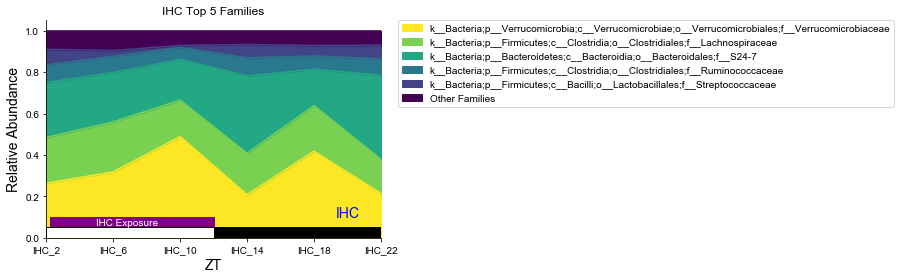

In [92]:
ax = fam_rf_labeled_ordered_IHC_sb_5.plot.area(title = "IHC Top 5 Families", colormap = 'viridis_r')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.text(4.5, 0.1, "IHC", ha='center', size=14, color='b')
ax.add_patch(Rectangle((0.05, 0.05), 2.45, 0.05,linewidth=1,edgecolor='purple',facecolor='purple'))
ax.add_patch(Rectangle((0,0.001), 3, 0.05,linewidth=1,edgecolor='k',facecolor='w'))
ax.add_patch(Rectangle((2.5,0.001), 3, 0.05,linewidth=1,edgecolor='k',facecolor='k'))
plt.text(1.2, 0.059, "IHC Exposure", ha='center', size=10, color='w')
ax.set_ylabel('Relative Abundance', size=14)
ax.set_xlabel('ZT', size=14)
sns.despine()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_family_areaplot_IHC.svg', dpi=300, bbox_inches="tight")

# Supplement - Number of Unique Cycling Families (Metacycle, R)

#### percentage acuired by determination of cycling families by MetaCycle out of total number families

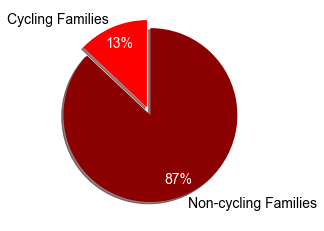

In [93]:
#5/38 id to Family level
labels = ['Cycling Families', "Non-cycling Families"]
sizes = [13, 87]
colors = ['red', 'darkred']
explode = (0.1, 0)

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.0f%%',
                          pctdistance=0.8,colors=colors, explode=explode,
                         shadow=True, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_Air_cFam.svg', dpi=300, bbox_inches="tight")
plt.show()

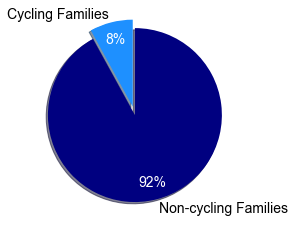

In [94]:
#3/38 id to Family level
labels = ['Cycling Families', "Non-cycling Families"]
sizes = [8, 92]
colors = ['dodgerblue', 'navy']
explode = (0.1, 0)

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.0f%%',
                          pctdistance=0.8,colors=colors, explode=explode,
                         shadow=True, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_IHC_cFam.svg', dpi=300, bbox_inches="tight")
plt.show()

## Alternative

In [95]:
data = {'condition': ['Air', 'Air', 'Air', 'Air', 'IHC', 'IHC', 'IHC', 'IHC'], 
        'percent': [13, 87, 71, 29, 8, 92, 64, 36],
        'cycling': ['cycling_fam', 'not_cycling_fam', 'cycling_reads', 'not_cycling_reads', 
                   'cycling_fam', 'not_cycling_fam', 'cycling_reads', 'not_cycling_reads']}
percents = pd.DataFrame(data=data)
percents

,condition,percent,cycling
0,Air,13,cycling_fam
1,Air,87,not_cycling_fam
2,Air,71,cycling_reads
3,Air,29,not_cycling_reads
4,IHC,8,cycling_fam
5,IHC,92,not_cycling_fam
6,IHC,64,cycling_reads
7,IHC,36,not_cycling_reads


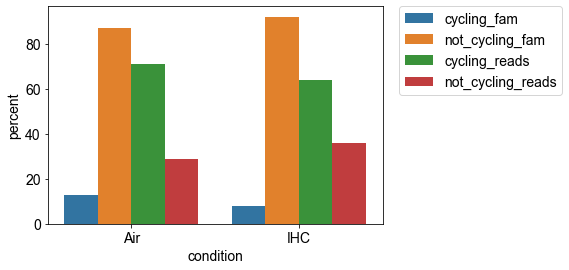

In [96]:
sns.barplot(x="condition", y="percent", hue='cycling', data=percents)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_cycling_all.svg', dpi=300, bbox_inches="tight")

In [97]:
fam = ['cycling_fam', 'not_cycling_fam']
percent_fam = percents[percents['cycling'].isin(fam)]
percent_fam

,condition,percent,cycling
0,Air,13,cycling_fam
1,Air,87,not_cycling_fam
4,IHC,8,cycling_fam
5,IHC,92,not_cycling_fam


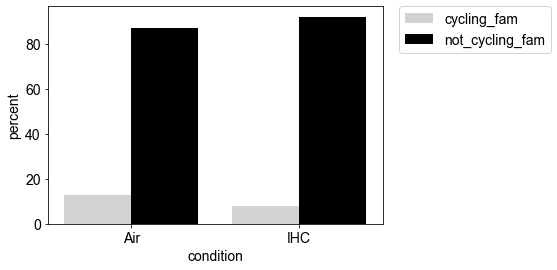

In [98]:
sns.barplot(x="condition", y="percent", hue='cycling', palette=['lightgrey', 'k'], data=percent_fam)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_cycling_percentfam.svg', dpi=300, bbox_inches="tight")

In [99]:
fam = ['cycling_reads', 'not_cycling_reads']
percent_reads = percents[percents['cycling'].isin(fam)]
percent_reads

,condition,percent,cycling
2,Air,71,cycling_reads
3,Air,29,not_cycling_reads
6,IHC,64,cycling_reads
7,IHC,36,not_cycling_reads


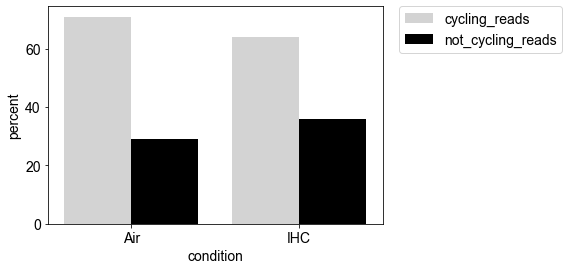

In [100]:
sns.barplot(x="condition", y="percent", hue='cycling', palette=['lightgrey', 'k'], data=percent_reads)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_cycling_percentreads.svg', dpi=300, bbox_inches="tight")

# F - Proportion of Reads from Cycling Families

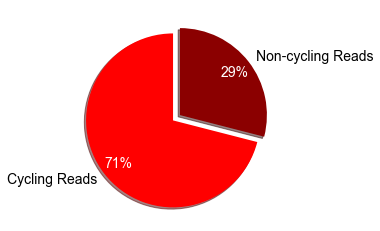

In [101]:
#196385/276000
labels = ['Cycling Reads', "Non-cycling Reads"]
sizes = [71, 29]
colors = ['red', 'darkred']
explode = (0.1, 0)

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.0f%%',
                          pctdistance=0.8,colors=colors, explode=explode,
                         shadow=True, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_Air_cFam_reads.svg', dpi=300, bbox_inches="tight")
plt.show()

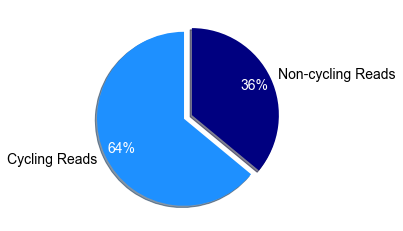

In [102]:
#177725/276000
labels = ['Cycling Reads', "Non-cycling Reads"]
sizes = [64, 36]
colors = ['dodgerblue', 'navy']
explode = (0.1, 0)

import matplotlib as mpl
mpl.rcParams['font.size'] = 14

_, _, autotexts = plt.pie(sizes, labels=labels,autopct='%1.0f%%',
                          pctdistance=0.8,colors=colors, explode=explode,
                         shadow=True, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_IHC_cFam_reads.svg', dpi=300, bbox_inches="tight")
plt.show()

# B - wUF PCoA TP Gradient

In [103]:
wUF_PCoA = pd.read_csv("../data/Microbiome/core_diversity_12000/wUF_PCoA_axes.txt", sep='\t', index_col=0)
wUF_PCoA.head()

,Axis1_52.9,Axis2_24.3
11548.A25.126.5a,-0.098310,-0.086845
11548.132.133.5a,-0.238670,-0.016917
11548.A31.132.3a,0.018964,-0.146612
11548.A29.130.5a,-0.142261,-0.116055
11548.A26.127.1a,0.002383,0.045526


In [104]:
wUF_PCoA_time = pd.merge(wUF_PCoA, metadata, left_index=True, right_index=True)
wUF_PCoA_time.head()

,Axis1_52.9,Axis2_24.3,anonymized_name,cage_food_consumption_g,cage_location,cage_notes,cage_number,timepoint,zt,cycle,...,physical_specimen_location,physical_specimen_remaining,qiita_study_id,sample_name_orit,sample_type,scientific_name,sex,taxon_id,title,treatment
11548.A25.126.5a,-0.098310,-0.086845,A25.126.5,not applicable,not applicable,not applicable,A25,5,18,night,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber
11548.132.133.5a,-0.238670,-0.016917,A32.133.5,not applicable,not applicable,not applicable,A32,5,18,night,...,LBR freezer,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A31.132.3a,0.018964,-0.146612,A31.132.3,not applicable,not applicable,not applicable,A31,3,10,day,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A29.130.5a,-0.142261,-0.116055,A29.130.5,not applicable,not applicable,not applicable,A29,5,18,night,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,On shelf
11548.A26.127.1a,0.002383,0.045526,A26.127.1,not applicable,not applicable,not applicable,A26,1,2,day,...,UCSDMI,True,11548,not applicable,feces,mouse gut metagenome,male,410661,IHC CR,In chamber


In [105]:
wUF_PCoA_time["both"] = wUF_PCoA_time['exposure_type'].astype(str) + "_" + wUF_PCoA_time['zt'].astype(str)

In [106]:
custom_dict = {'Air_2':0, 'Air_6':1, 'Air_10':2, 'Air_14':3, 'Air_18':4, 'Air_22':5, 
                   'IHC_2':6,'IHC_6':7,'IHC_10':8,'IHC_14':9, 'IHC_18':10, 'IHC_22':11}
wUF_PCoA_time2 = wUF_PCoA_time.iloc[wUF_PCoA_time['both'].map(custom_dict).argsort()]
#sort predictably, make it easier to assign colors

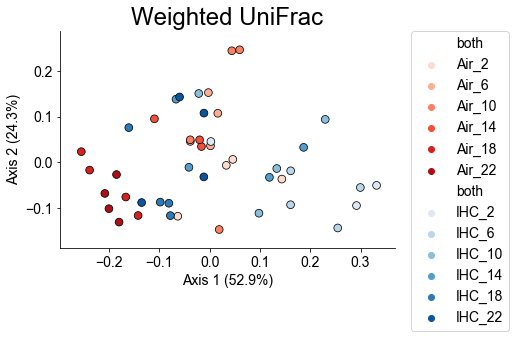

In [107]:
g = sns.scatterplot(x='Axis1_52.9', y='Axis2_24.3', hue="both", palette="Reds", s=60, edgecolor='k',
                data=wUF_PCoA_time2[wUF_PCoA_time2["exposure_type"] == "Air"])
g = sns.scatterplot(x='Axis1_52.9', y='Axis2_24.3', hue="both", palette="Blues", s=60, edgecolor='k',
                data=wUF_PCoA_time2[wUF_PCoA_time2["exposure_type"] == "IHC"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g.set_xlabel('Axis 1 (52.9%)', size=14)
g.set_ylabel('Axis 2 (24.3%)', size=14)
sns.despine()
plt.title("Weighted UniFrac", fontsize=24)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_fig1_panelG.svg', dpi=300, bbox_inches="tight")

# C - wUF PCoA Axis 1 over time

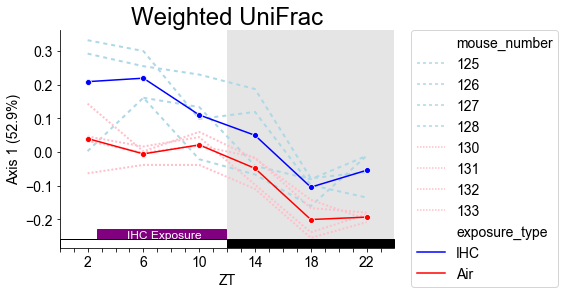

In [108]:
dashall = [(2, 2),(2, 2), (2, 2), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1) ]
ax = sns.lineplot(x='zt', y='Axis1_52.9', hue="mouse_number", style="mouse_number", 
                  palette=['lightblue', 'lightblue', 'lightblue', 'lightblue', 'pink', 'pink', 'pink', 'pink'], 
             estimator=None, lw=2, data=wUF_PCoA_time, dashes=dashall)
ax = sns.lineplot(x='zt', y='Axis1_52.9', hue='exposure_type', palette=['blue', 'red'], 
             marker="o", ci=None, data=wUF_PCoA_time)
plt.xlim(0, 24)
ax.set_xticks(range(24)) 
ax.set_xticklabels(['', '', '2','', '','', '6','', '','', '10','', '','', '14','', '','', '18','', '','', '22','', '',])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
rect = patches.Rectangle((12,-0.3),12,0.75,linewidth=1,edgecolor='none',facecolor='k', alpha=0.1)
ax.add_patch(rect)
exp = patches.Rectangle((2.7, -0.28), 9.2, 0.05,linewidth=1,edgecolor='purple',facecolor='purple')
ax.add_patch(exp)
day = patches.Rectangle((0,-0.3), 12, 0.04,linewidth=1,edgecolor='k',facecolor='w')
ax.add_patch(day)
night = patches.Rectangle((12,-0.3), 12, 0.04,linewidth=1,edgecolor='k',facecolor='k')
ax.add_patch(night)
ax.text(7.5, -0.256, "IHC Exposure", ha='center', size=12, color='w')
ax.set_ylabel('Axis 1 (52.9%)', size=14)
ax.set_xlabel('ZT', size=14)
sns.despine()
plt.title("Weighted UniFrac", fontsize=24)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/cIHC_fig1_panelH.svg', dpi=300, bbox_inches="tight")

In [109]:
for tk in wUF_PCoA_time.zt.unique():
    TP = wUF_PCoA_time[wUF_PCoA_time["zt"] == tk]
    p = TP[TP['exposure_type'] == 'Air']
    q = TP[TP['exposure_type'] == 'IHC']
    x = p['Axis1_52.9'].values
    y = q['Axis1_52.9'].values
    w, z = mannwhitneyu(x, y)
    print("ZT", tk)
    print(z)
    print("___________________________")
#significant ZT6, ZT18, ZT22
#Trend: ZT10

ZT 18
0.030300984856003035
___________________________
ZT 10
0.09696542614120535
___________________________
ZT 2
0.188379558905791
___________________________
ZT 14
0.29794154528258887
___________________________
ZT 6
0.015191410988288745
___________________________
ZT 22
0.015191410988288745
___________________________
